In [33]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

In [2]:
img=cv2.imread('D:/TSF/COLOR.png')

Shape: (331, 619, 3)


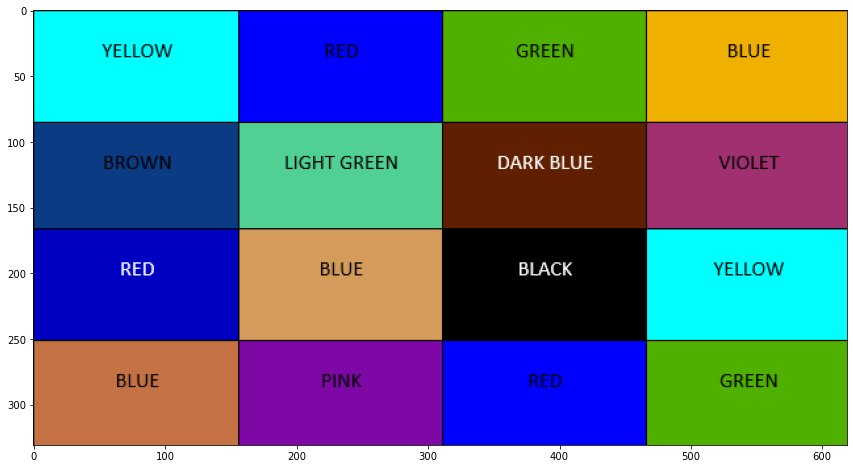

In [3]:
plt.figure(figsize=(20,8))
plt.imshow(img)
print("Shape: {}".format(img.shape))

In [4]:
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

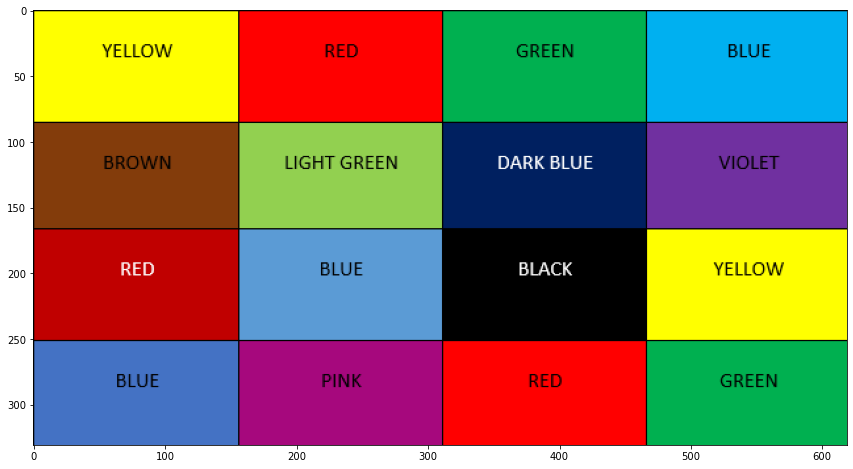

In [5]:
plt.figure(figsize=(20,8))
plt.imshow(img_RGB)

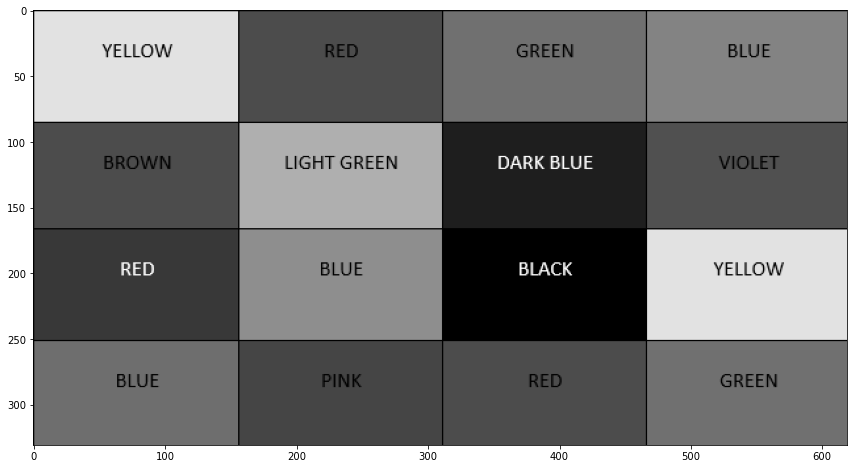

In [6]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,8))
plt.imshow(gray_image, cmap='gray')

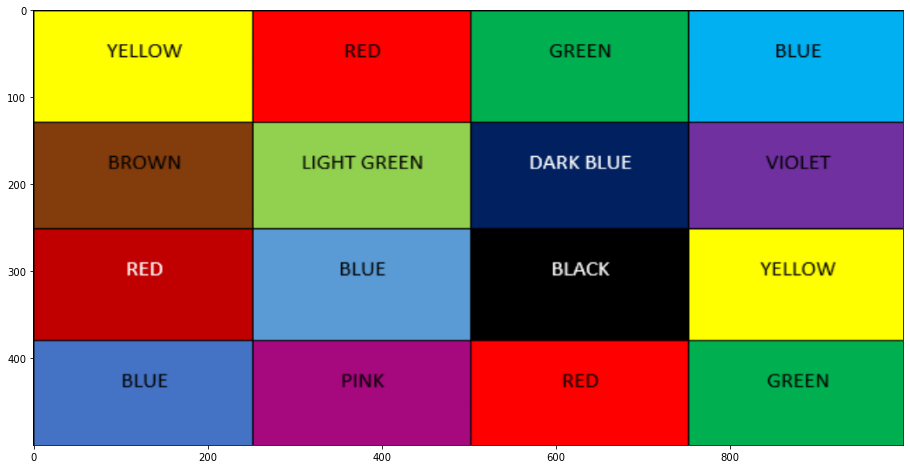

In [7]:
resized_image = cv2.resize(img_RGB, (1000, 500))
plt.figure(figsize=(20,8))
plt.imshow(resized_image)

In [8]:
img_HSV = cv2.cvtColor(img_RGB,cv2.COLOR_RGB2HSV)

In [9]:
lower = np.array([25,150,50])
upper = np.array([35,255,255])

In [10]:
mask=cv2.inRange(img_HSV,lower,upper)

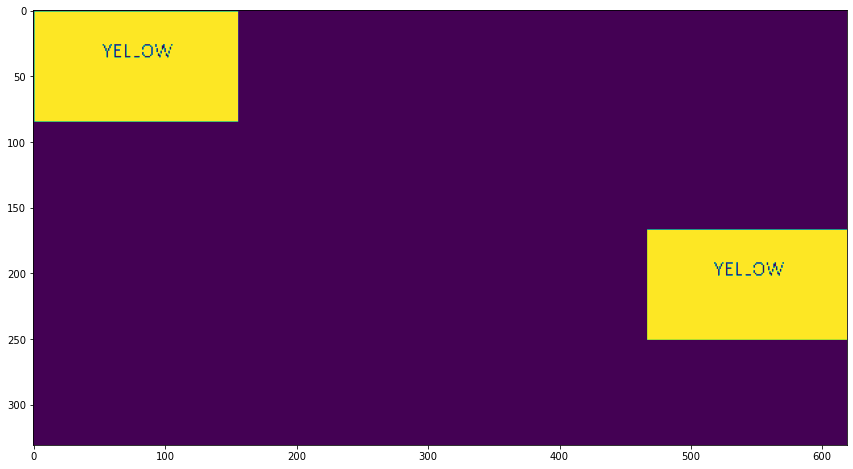

In [11]:
plt.figure(figsize=(20,8))
plt.imshow(mask)

In [12]:
res = cv2.bitwise_and(img_RGB, img_RGB,mask=mask)

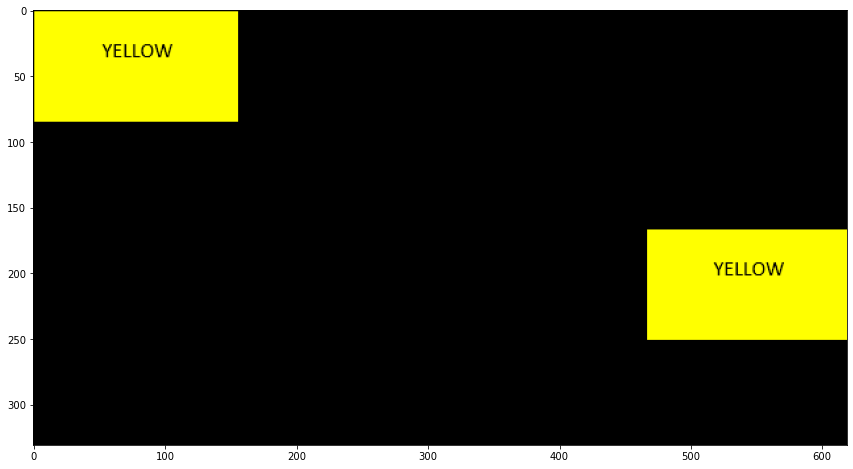

In [13]:
plt.figure(figsize=(20,8))
plt.imshow(res)

In [14]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [24]:
image_path='D:/TSF/COLOR.png'
def get_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [25]:
def get_colors(image, number_of_colors, pie_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    #KMeans expects the input to be of two dimensions, so we use Numpy’s reshape function to reshape the image data.
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    count = Counter(labels)
    # sort to ensure correct color percentage
    count = dict(sorted(count.items()))
    
    #To find the colors
    center_colors = clf.cluster_centers_
    
    ordered_colors = [center_colors[i] for i in count.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in count.keys()]
    rgb_colors = [ordered_colors[i] for i in count.keys()]

    if (pie_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(count.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([215.7873936 , 148.96351844,  54.44131424]),
 array([  2.69834345,  14.60367101, 207.32904424]),
 array([ 25.45059416, 239.0337417 , 219.67021399]),
 array([ 79.03148589, 173.95470928,   1.74206052]),
 array([41.67065263, 18.03104561,  5.58035088]),
 array([141.55307302,  28.47825627, 137.90893713])]

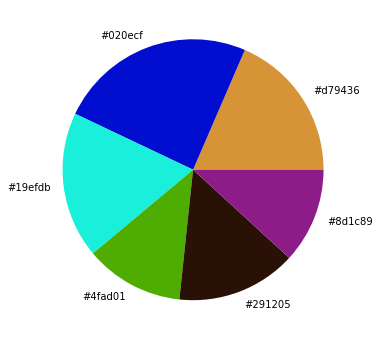

In [26]:
get_colors(img, 6, True)

In [27]:
IMAGE_DIRECTORY = 'D:/TSF'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'RED': [128, 0, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

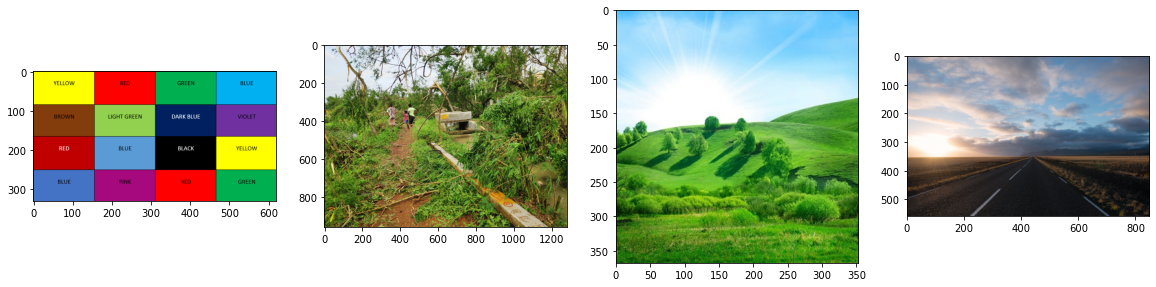

In [28]:
plt.figure(figsize=(20, 8))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [29]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [30]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

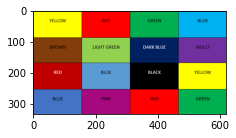

In [32]:

plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)